In [1]:
import re
from collections import Counter
import os
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
#path_of_lib = '/home/ksn38/.local/lib/python3.6/site-packages/django/'
path_of_lib = '/usr/lib/python3.6/multiprocessing/'

In [3]:
list_classes = []
list_classes_for_graph = []
list_classes_for_html = []

#open .py file and get names classes with regex
def open_and_re(path, list_classes, list_classes_for_graph, list_classes_for_html):
    with open(path, 'r', encoding='utf-8') as file:
        classes = re.findall('^class\s\w+\(.+\)|^class\s\w+\:', file.read(), re.MULTILINE)
        for i in classes:
            #class is taken for graph and counter at least 5 characters in name 
            list_1_or_more_classes = re.findall('\w{5,}\.*', i[6:])
            list_1_or_more_classes_origin = list_1_or_more_classes.copy()
            for k in list_1_or_more_classes_origin:
                if k[-1] == '.':
                    list_1_or_more_classes.remove(k)
            list_classes.extend(list_1_or_more_classes)
            if len(list_1_or_more_classes) > 1:
                for j in list_1_or_more_classes[1:]:
                    list_classes_for_graph.append([list_1_or_more_classes[0], j])
        if len(classes) > 0:
            list_classes_for_html.append(f'<a href="{path}">{path}</a>')
        for c in classes:
            list_classes_for_html.append(f'<div>{c[6:]}</div>')

#run previous function on multiple files
def printer(tuple_from_oswalk):
    files = tuple_from_oswalk[2]
    for f in files:
        if tuple_from_oswalk[0][-1] != '/' and f[-3:] == '.py':
            open_and_re(tuple_from_oswalk[0] + '/' + f, list_classes, \
                        list_classes_for_graph, list_classes_for_html)
        elif tuple_from_oswalk[0][-1] == '/' and f[-3:] == '.py':
            open_and_re(tuple_from_oswalk[0] + f, list_classes, \
                        list_classes_for_graph, list_classes_for_html)

In [4]:
#run previous function on multiple directories
for i in os.walk(path_of_lib):
    printer(i)

class_counter = Counter(list_classes)

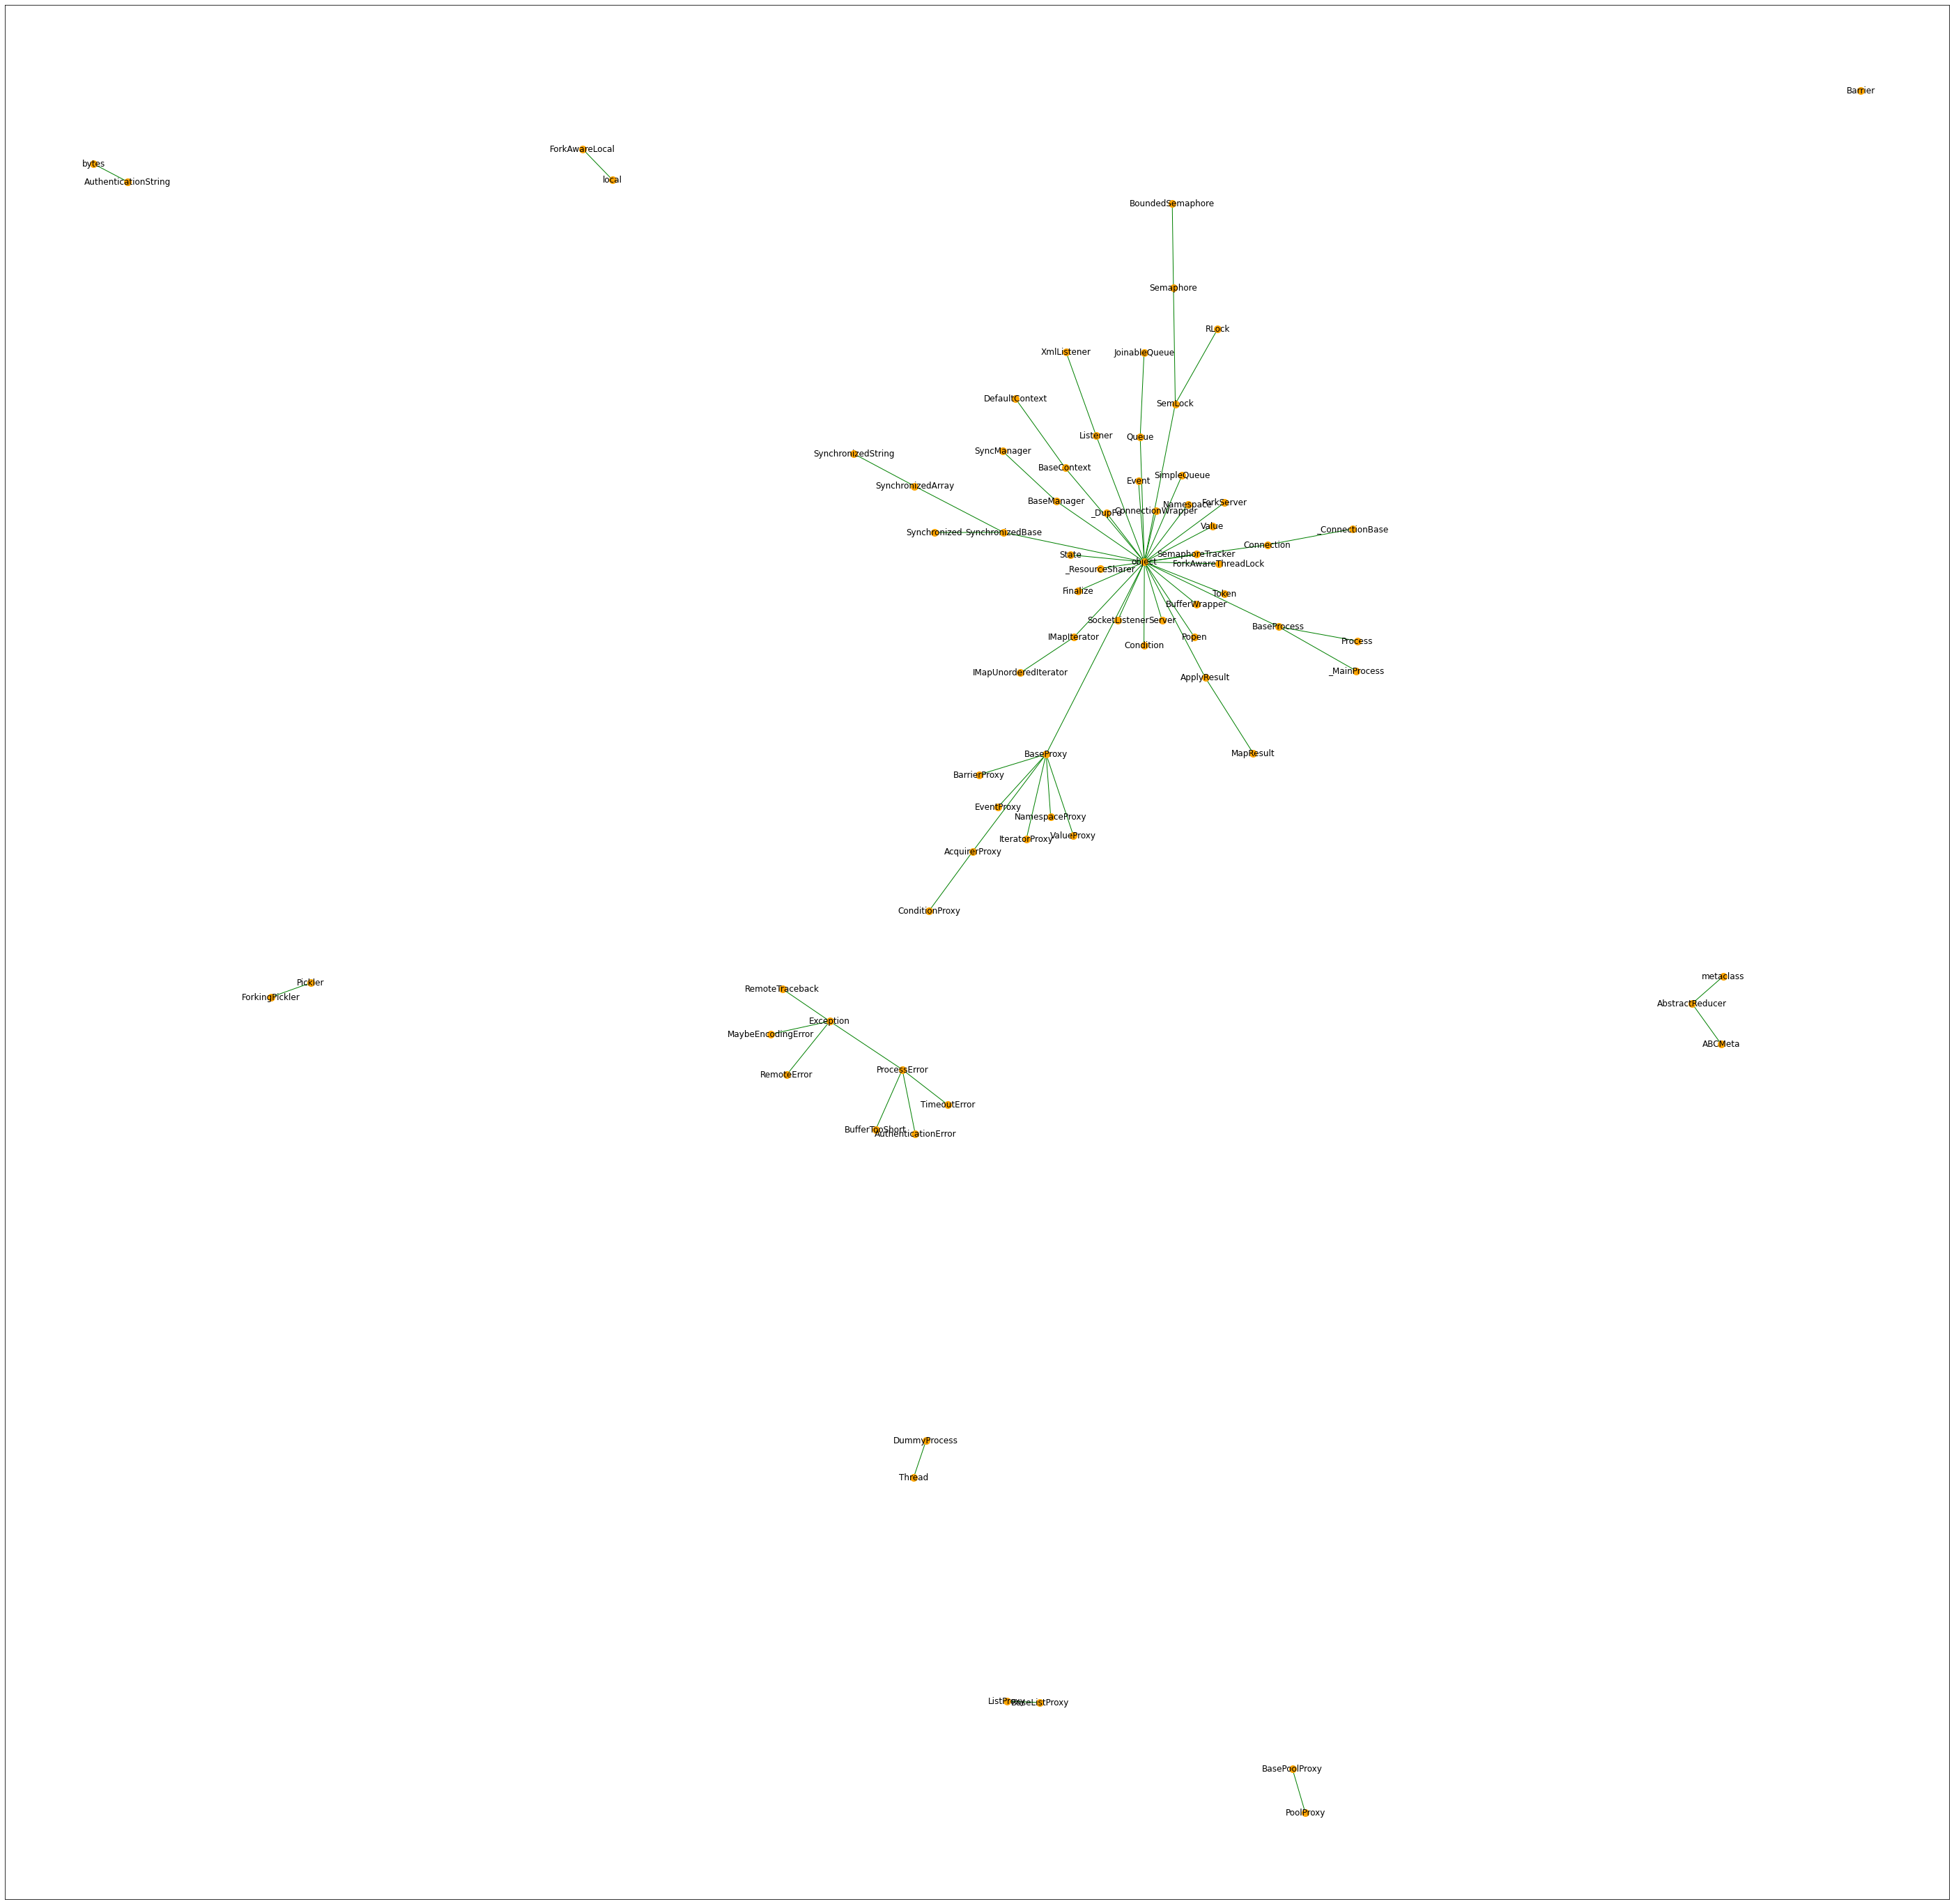

In [5]:
#create graph
plt.figure(figsize=(50, 50))
G = nx.Graph()

for i in list_classes_for_graph:
    G.add_edge(*i, minlen = 1000)

pos = nx.spring_layout(G, k=0.05, iterations=25)
nx.draw_networkx(G, pos, node_color='orange', edge_color='g', node_size=100)

plt.show()

In [6]:
#dict is needed for red color in html 
class_counter_gt_1 = {}

for i in class_counter.items():
    if i[1] > 1:
        class_counter_gt_1[i[0]] = i[1]
    
class_counter_gt_1_origin = class_counter_gt_1.copy()

In [7]:
#values of class_counter_gt_1 have been changed for convenient colors
dict_line = dict(zip(sorted(set(class_counter_gt_1.values()), reverse=True), \
                     np.linspace(0, 150, len(set(class_counter_gt_1.values())))))

for k, v in class_counter_gt_1.items():
    class_counter_gt_1[k] = dict_line[v]

In [8]:
#added colors and counter values in html
for i in range(len(list_classes_for_html)):
    c = re.findall('<div>\w+', list_classes_for_html[i])
    if len(c) != 0:
        for j in class_counter_gt_1:
            if j == c[0][5:]:
                list_classes_for_html[i] = '<div style="color: rgb(' + \
                str(255 - class_counter_gt_1[j]) + \
                ', 0, 0)">' + list_classes_for_html[i][5:-6] + \
                f' = {class_counter_gt_1_origin[j]}</div>'

In [9]:
html_file = open('classes.html', 'w')
list_classes_for_html.append('<br><div><b>Class counter</b></div>')
list_classes_for_html.extend(sorted(class_counter_gt_1_origin.items(), key= lambda item: item[1], reverse=True))
html_file.write(''.join(map(str, list_classes_for_html)))
html_file.close()

In [10]:
#print(sorted(class_counter_gt_1_origin.items(), key= lambda item: item[1], reverse=True))